In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_path = 'Dataset/creditcard.csv'
dataset = pd.read_csv(dataset_path)

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class
0    284315
1       492
Name: count, dtype: int64


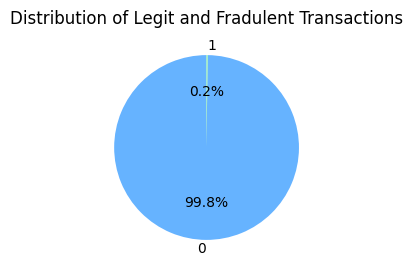

In [10]:
class_counts = dataset['Class'].value_counts()
print(class_counts)

plt.figure(figsize = (3, 3))
plt.pie(class_counts, labels = class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title("Distribution of Legit and Fradulent Transactions")
plt.show()

The dataset is highly unbalanced


In [12]:
#sepereating the data for analysis
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [13]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling:
Build a sample dataset containing similar distributions of data of legit and fradulent transactions.

In [18]:
legit_sample = legit.sample(n=492)


In [27]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
267648,162859.0,-0.881874,0.576387,0.662771,-2.232185,0.074692,-0.243619,0.628582,-1.070300,-1.545460,...,1.181446,0.855518,-0.507611,0.639184,1.065233,0.170945,-0.064135,0.031409,74.00,0
153214,98208.0,2.079152,-0.422823,-1.366163,-1.796719,-0.286816,-1.503462,0.049232,-0.413885,3.120515,...,-0.281501,-0.272730,0.181956,0.019875,0.103773,-1.069894,0.001181,-0.068162,4.88,0
32562,36852.0,-0.605055,0.321092,1.685046,-0.972949,0.420412,-0.502464,0.898269,-0.497586,0.713161,...,-0.339013,-0.627361,-0.169841,-0.114755,-0.516837,0.561588,-0.544624,-0.303074,18.36,0
60429,49318.0,0.942214,-0.385977,1.288062,1.181461,-1.064583,0.174238,-0.723699,0.235292,0.763371,...,0.330603,0.822038,-0.115518,0.086945,0.246928,-0.233296,0.072874,0.055223,99.95,0
222358,142942.0,1.946720,-0.038952,-2.276002,0.887437,1.050057,-0.295876,0.666578,-0.253480,-0.182177,...,0.047484,-0.007758,-0.186069,-1.411909,0.435551,-0.536445,-0.047773,-0.068157,90.00,0


In [28]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [29]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96670.640244,-0.039212,-0.062750,0.074937,0.019525,0.061551,0.105813,0.017357,-0.062574,0.055793,...,0.025678,0.014491,-0.037811,0.049534,-0.006386,0.002666,-0.034063,0.015918,-0.010461,101.725488
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [30]:
X = new_dataset.drop(columns = 'Class', axis = 1)
y = new_dataset['Class']

In [31]:
print(X.shape)
print(y.shape)

(984, 30)
(984,)


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify = y,  random_state=42)

In [45]:
X_all = dataset.drop(columns=['Class'])
y_all = dataset['Class']

In [51]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve,auc
from mlxtend.plotting import plot_confusion_matrix

Support vector on testing data:
              precision    recall  f1-score   support

           0       0.58      0.51      0.54        99
           1       0.56      0.63      0.59        98

    accuracy                           0.57       197
   macro avg       0.57      0.57      0.57       197
weighted avg       0.57      0.57      0.57       197



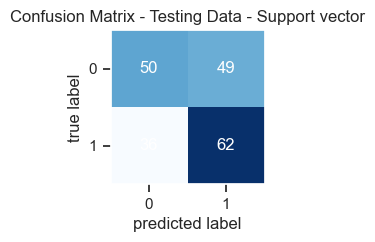

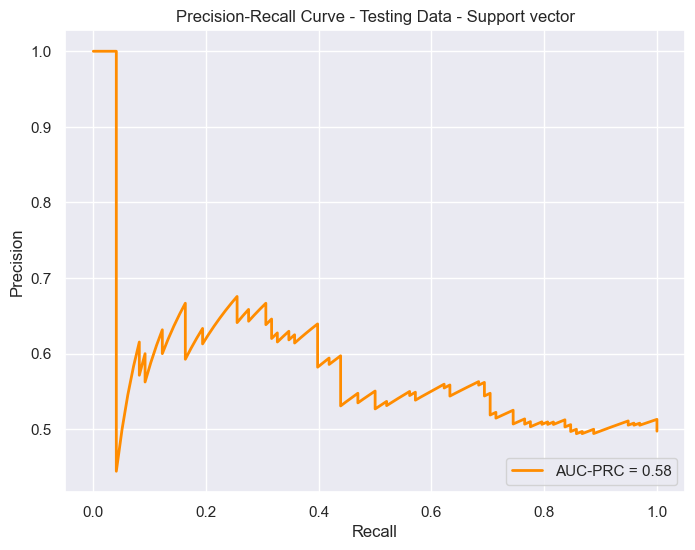



Support vector on the entire dataset:


c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



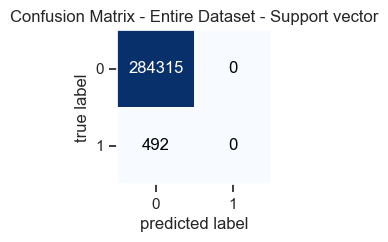

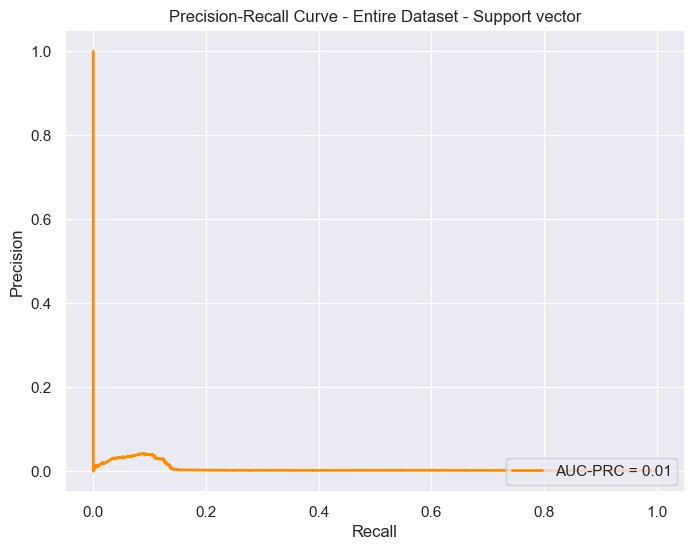



Logistic regression on testing data:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        99
           1       0.97      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



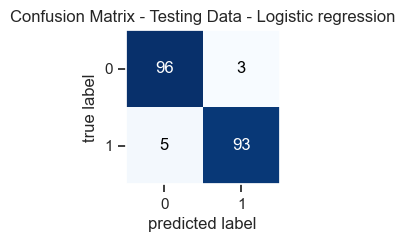

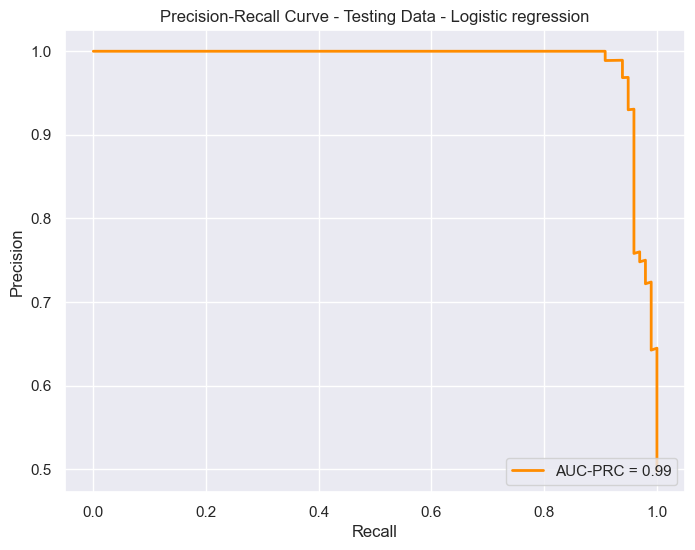



Logistic regression on the entire dataset:


c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.68      0.69      0.69       492

    accuracy                           1.00    284807
   macro avg       0.84      0.85      0.84    284807
weighted avg       1.00      1.00      1.00    284807



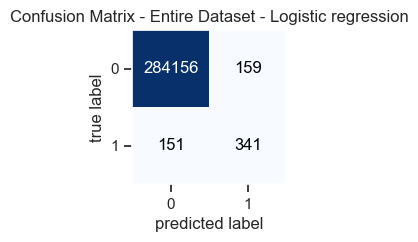

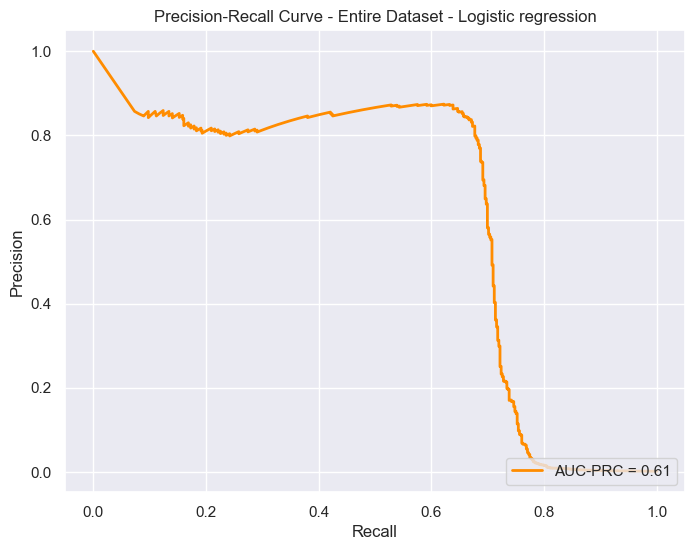



Random Forest on testing data:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        99
           1       0.97      0.94      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



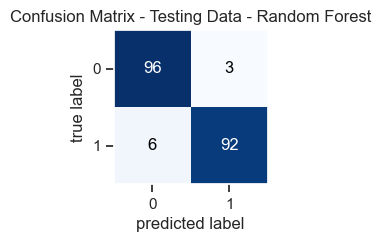

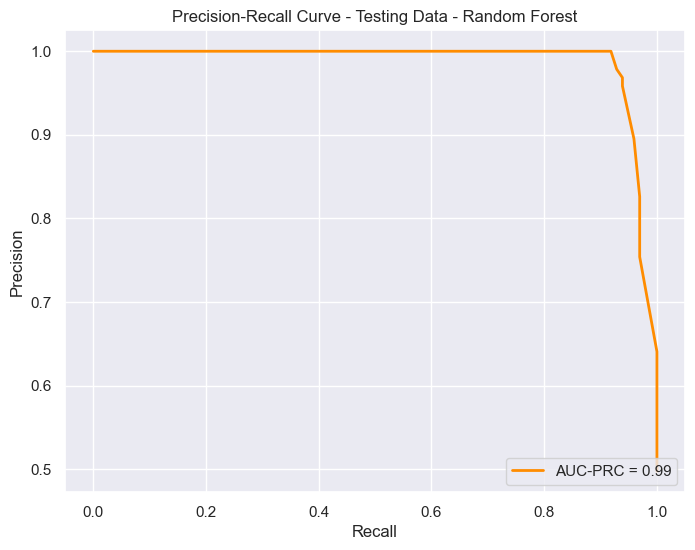



Random Forest on the entire dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      0.95      0.98       492

    accuracy                           1.00    284807
   macro avg       1.00      0.98      0.99    284807
weighted avg       1.00      1.00      1.00    284807



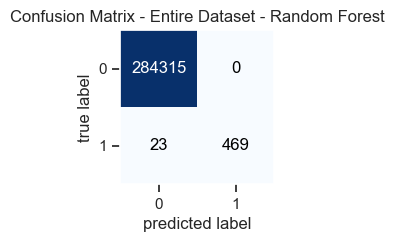

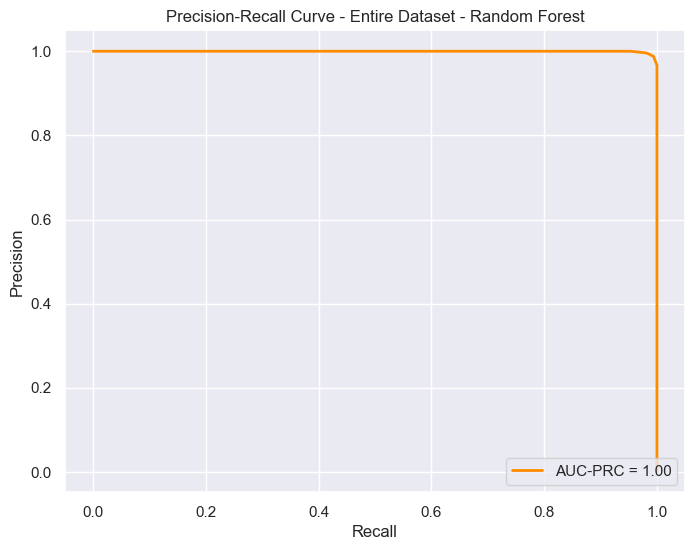



Decision Trees on testing data:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        99
           1       0.94      0.94      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



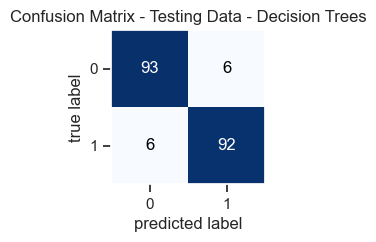

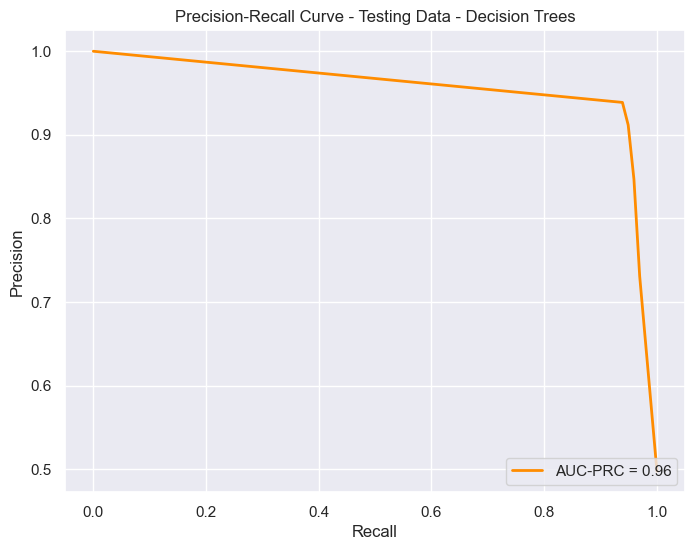



Decision Trees on the entire dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.98      0.84      0.90       492

    accuracy                           1.00    284807
   macro avg       0.99      0.92      0.95    284807
weighted avg       1.00      1.00      1.00    284807



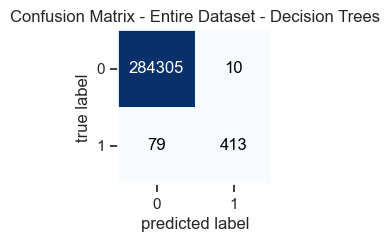

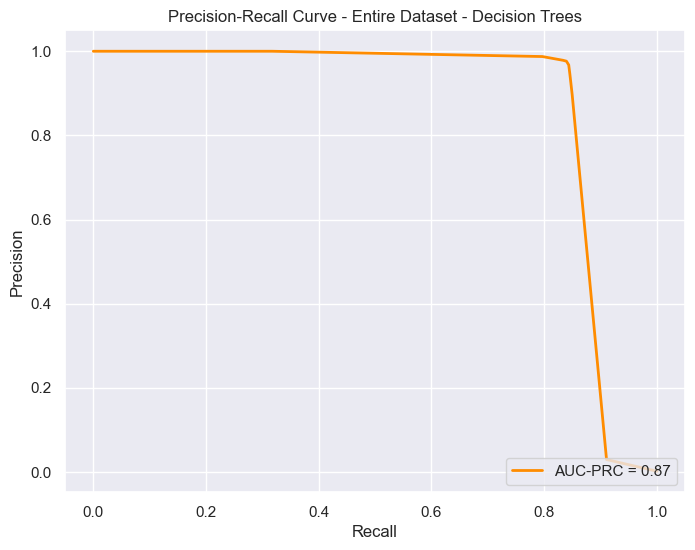



KNeighbourClassifier on testing data:
              precision    recall  f1-score   support

           0       0.59      0.61      0.60        99
           1       0.59      0.57      0.58        98

    accuracy                           0.59       197
   macro avg       0.59      0.59      0.59       197
weighted avg       0.59      0.59      0.59       197



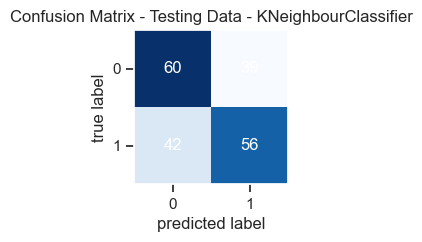

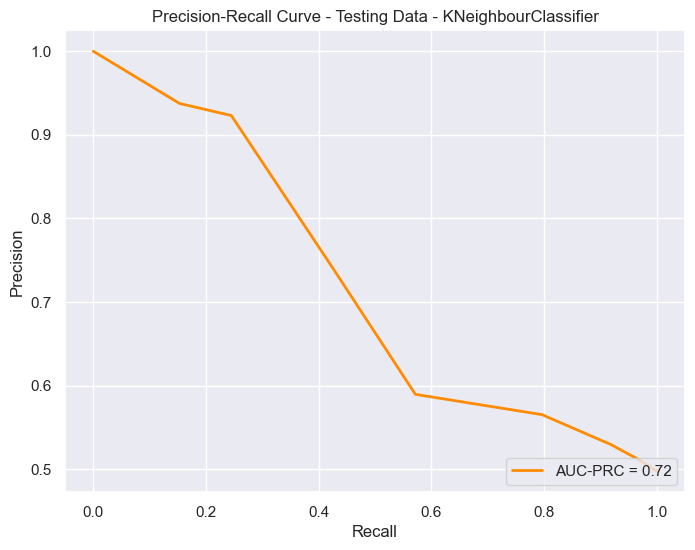



KNeighbourClassifier on the entire dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      0.07      0.13       492

    accuracy                           1.00    284807
   macro avg       1.00      0.53      0.56    284807
weighted avg       1.00      1.00      1.00    284807



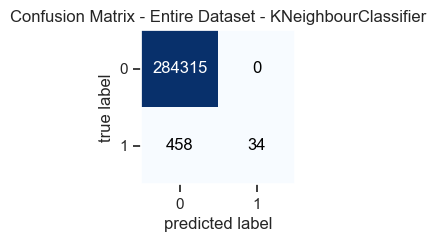

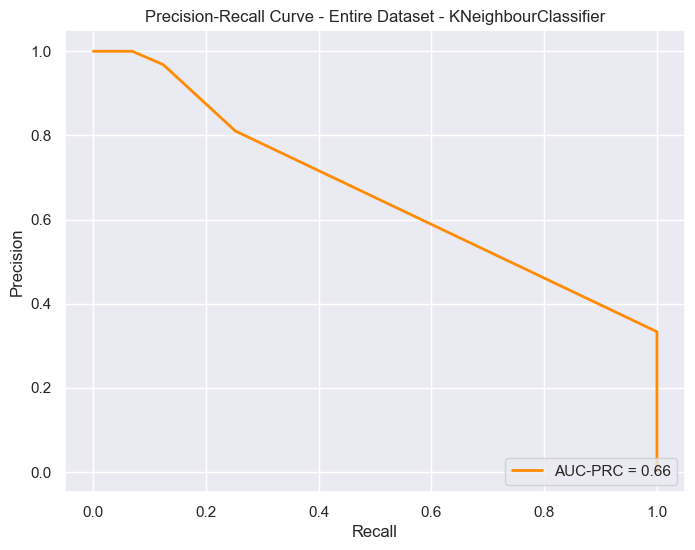



XGBoost on testing data:


c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\xgboost\data.py:359: Fu

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        99
           1       0.95      0.97      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



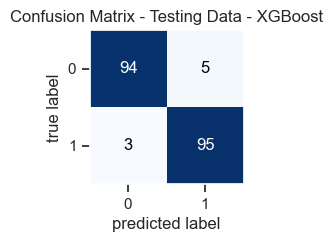

c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\xgboost\data.py:359: Fu

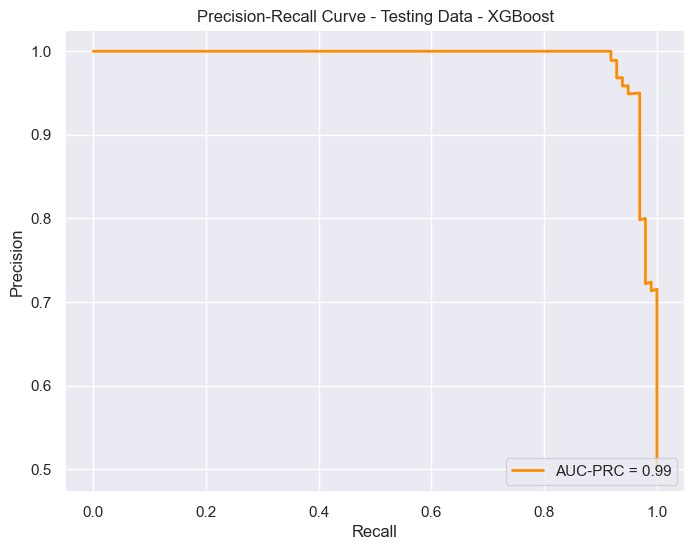



XGBoost on the entire dataset:


c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\xgboost\data.py:359: Fu

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      1.00      1.00       492

    accuracy                           1.00    284807
   macro avg       1.00      1.00      1.00    284807
weighted avg       1.00      1.00      1.00    284807



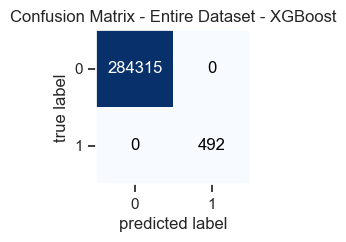

c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\siddh\OneDrive\Desktop\Projects\Credit Card Fraud Detection 2\myenv\lib\site-packages\xgboost\data.py:359: Fu

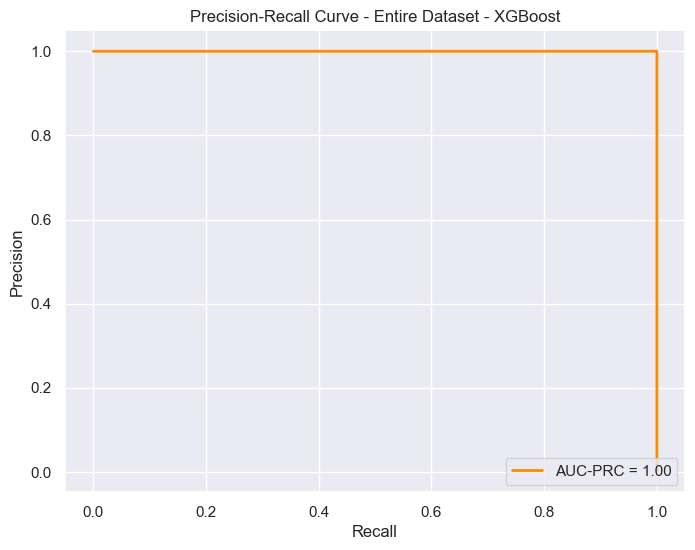



Adaboost on testing data:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        99
           1       0.96      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



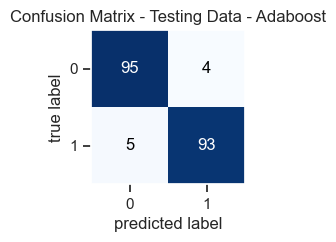

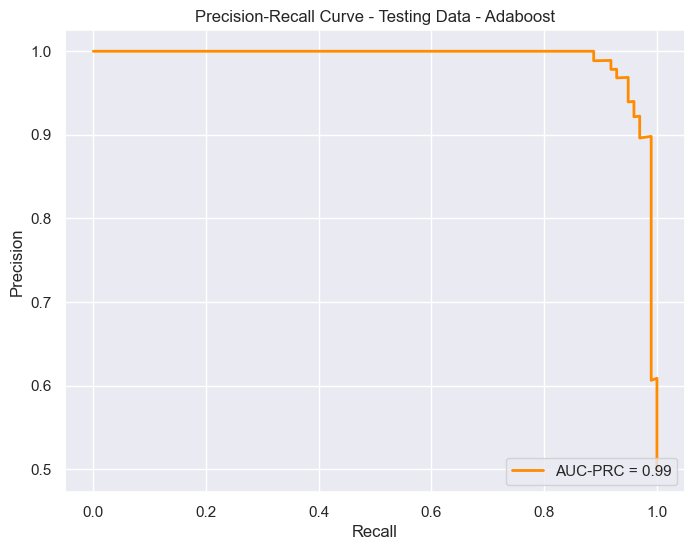



Adaboost on the entire dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.80      0.66      0.72       492

    accuracy                           1.00    284807
   macro avg       0.90      0.83      0.86    284807
weighted avg       1.00      1.00      1.00    284807



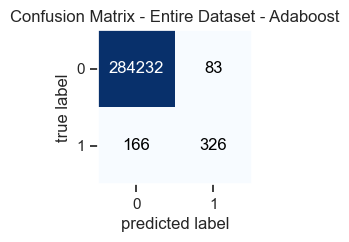

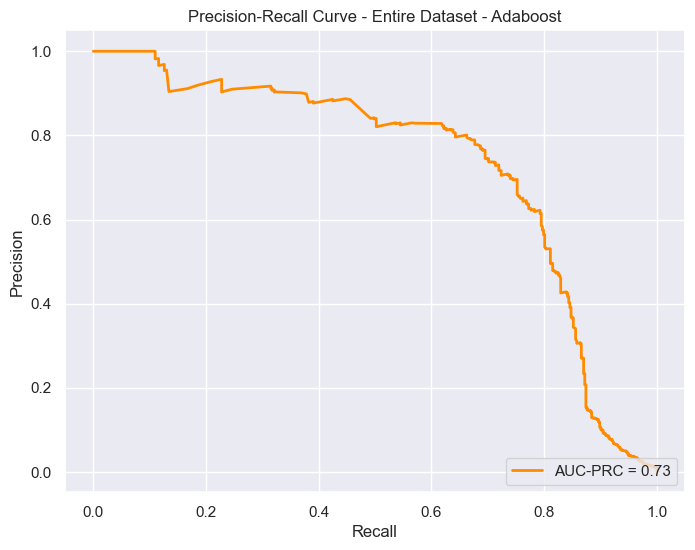

In [53]:
models = [[SVC(probability = True), "Support vector"],
        [LogisticRegression(), "Logistic regression"],
         [RandomForestClassifier(n_estimators = 10), "Random Forest"],
         [DecisionTreeClassifier(max_depth = 7), "Decision Trees"],
         [KNeighborsClassifier(n_neighbors = 7), "KNeighbourClassifier"],
         [xgb.XGBClassifier(), "XGBoost"],
         [AdaBoostClassifier(n_estimators = 25), "Adaboost"]]
sns.set (rc = {'figure.figsize':(2, 2)})
accuracies = []
for model, name in models:
    print(f"{name} on testing data:")
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    print(classification_report(y_test, y_pred_test))
    cnf_test = confusion_matrix(y_test, y_pred_test)
    fig, ax = plot_confusion_matrix(conf_mat=cnf_test)
    plt.title(f'Confusion Matrix - Testing Data - {name}')
    plt.show()

    # Calculate precision-recall curve for testing data
    precision_test, recall_test, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_prc_test = auc(recall_test, precision_test)

    # Plot precision-recall curve for testing data
    plt.figure(figsize=(8, 6))
    plt.plot(recall_test, precision_test, color='darkorange', lw=2, label=f'AUC-PRC = {auc_prc_test:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - Testing Data - {name}')
    plt.legend(loc='lower right')
    plt.show()

    print("\n")

    print(f"{name} on the entire dataset:")
    model.fit(X_all, y_all)
    y_pred_all = model.predict(X_all)
    print(classification_report(y_all, y_pred_all))
    cnf_all = confusion_matrix(y_all, y_pred_all)
    fig, ax = plot_confusion_matrix(conf_mat=cnf_all)
    plt.title(f'Confusion Matrix - Entire Dataset - {name}')
    plt.show()

    # Calculate precision-recall curve for entire dataset
    precision_all, recall_all, _ = precision_recall_curve(y_all, model.predict_proba(X_all)[:, 1])
    auc_prc_all = auc(recall_all, precision_all)

    # Plot precision-recall curve for entire dataset
    plt.figure(figsize=(8, 6))
    plt.plot(recall_all, precision_all, color='darkorange', lw=2, label=f'AUC-PRC = {auc_prc_all:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - Entire Dataset - {name}')
    plt.legend(loc='lower right')
    plt.show()

    print("\n")

In [47]:
print(accuracies)

[0.5685279187817259, 0.46575751298247586, 0.9593908629441624, 0.9569743721186628, 0.9593908629441624, 0.9732661065212582, 0.9390862944162437, 0.924952687258389, 0.5888324873096447, 0.6645377395920746, 0.9593908629441624, 0.9650956612723705, 0.9543147208121827, 0.9429543515433259]
